In [9]:
import os
import sys

sys.path.append('../')

from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

from utils.dataio import *
from utils.visualization import *

DATA_DIR = '../data/'

### Load results

In [10]:
IP_gt = load_mat(os.path.join(DATA_DIR, 'IP_APACT_1.mat'))
SOS_gt = load_mat(os.path.join(DATA_DIR, 'SOS_apact.mat'))

In [11]:
n_delays = 16
hls, hfs = 0, 256
lr_nf = 5e-3

In [12]:
RESULTS_DIR = '../results_new/numerical_full_apact/'
IP_nf = load_mat(os.path.join(RESULTS_DIR, 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs=64_lr={lr_nf:.1e}', 'IP_rec.mat'))
SOS_nf = load_mat(os.path.join(RESULTS_DIR, 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs=64_lr={lr_nf:.1e}', 'SOS_rec.mat'))

In [13]:
RESULTS_DIR = '../results_rebuttals/numerical_full_apact/'
IP_nf_no_k = load_mat(os.path.join(RESULTS_DIR, 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs=64_lr={lr_nf:.1e}', 'IP_rec.mat'))
SOS_nf_no_k = load_mat(os.path.join(RESULTS_DIR, 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs=64_lr={lr_nf:.1e}', 'SOS_rec.mat'))

In [14]:
RESULTS_DIR = '../results_rebuttals1/numerical_full_apact/'
IP_nf_k2 = load_mat(os.path.join(RESULTS_DIR, 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs=64_lr={lr_nf:.1e}', 'IP_rec.mat'))
SOS_nf_k2 = load_mat(os.path.join(RESULTS_DIR, 'NF-APACT', f'{n_delays}delays_{hls}lyrs_{hfs}fts_10epochs_bs=64_lr={lr_nf:.1e}', 'SOS_rec.mat'))

In [15]:
[IP_nf_no_k, IP_nf, IP_nf_k2] = [standardize(img) for img in [IP_nf_no_k, IP_nf, IP_nf_k2]]
data_range_img = 15.5 # IP_das.max() - IP_das.min()
data_range_SOS = 150 # SOS_gt.max() - SOS_gt.min()
print(data_range_img, data_range_SOS)

15.5 150


### Create figure

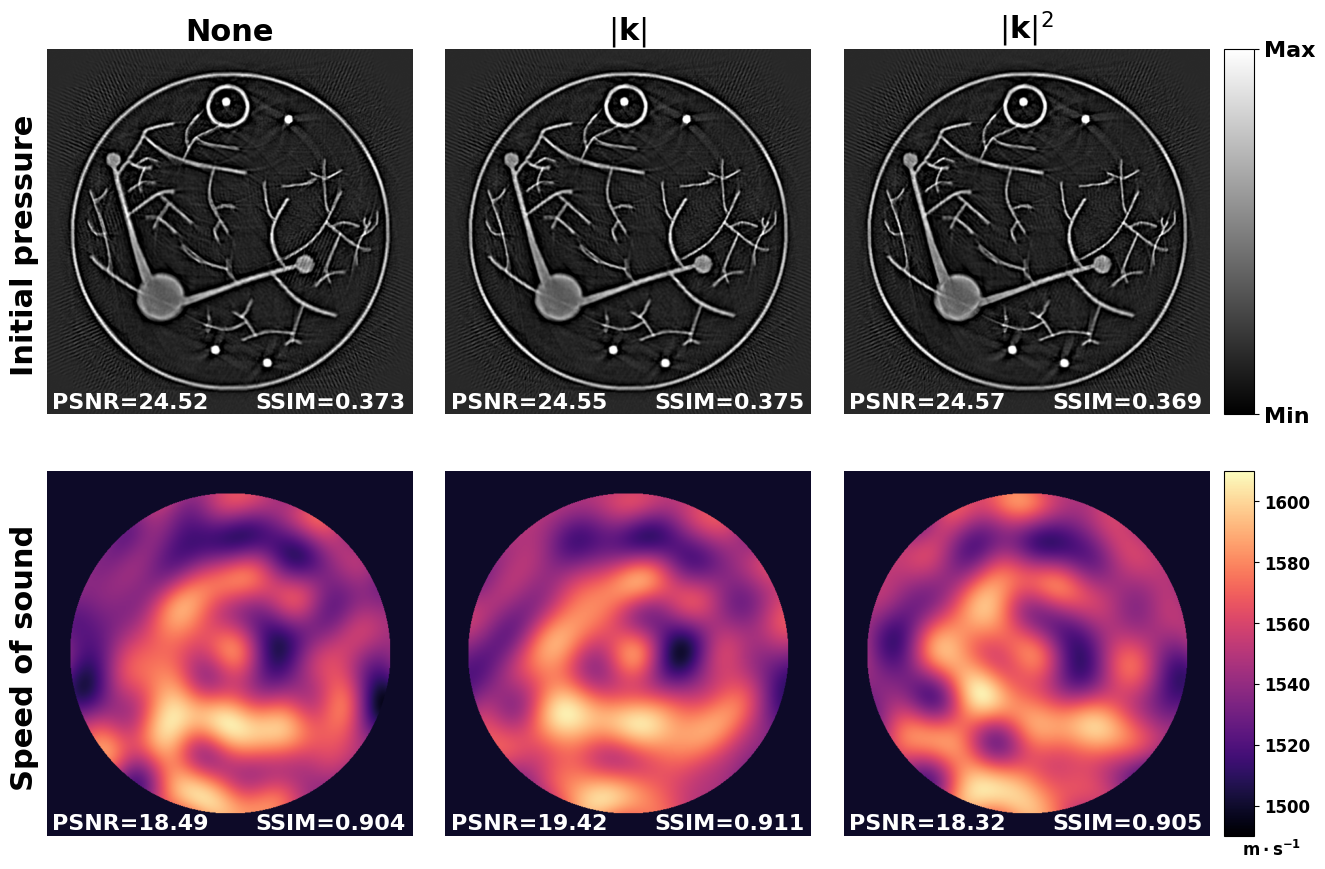

In [16]:
fig = plt.figure(figsize=(15, 10.5))
gs = GridSpec(4,6)
norm = Normalize(vmax=5, vmin=-1)
norm_SOS = Normalize(vmax=1610, vmin=1490)

ax = plt.subplot(gs[0:2,0:2])
plt.imshow(IP_nf_no_k, cmap='gray', norm=norm)
plt.axis('off')
plt.title('None', fontsize=22, fontweight='semibold')
ax.text(s='PSNR={:.2f}'.format(psnr(IP_gt, IP_nf_no_k, data_range=data_range_img)), x=8, y=550, fontsize=16, fontweight='semibold', color='white')
ax.text(s='SSIM={:.3f}'.format(ssim(IP_gt, IP_nf_no_k, data_range=data_range_img)), x=320, y=550, fontsize=16, fontweight='semibold', color='white')
ax.set_title('Initial pressure', fontsize=22, fontweight='semibold', loc='left', rotation=90, x=-0.1, y=0.1)

ax = plt.subplot(gs[0:2,2:4])
plt.imshow(IP_nf, cmap='gray', norm=norm)
plt.axis('off')
plt.title(r'$\vert\mathbf{k}\vert$', fontsize=22, fontweight='semibold')
ax.text(s='PSNR={:.2f}'.format(psnr(IP_gt, IP_nf, data_range=data_range_img)), x=8, y=550, fontsize=16, fontweight='semibold', color='white')
ax.text(s='SSIM={:.3f}'.format(ssim(IP_gt, IP_nf, data_range=data_range_img)), x=320, y=550, fontsize=16, fontweight='semibold', color='white')

ax = plt.subplot(gs[0:2,4:6])
plt.imshow(IP_nf_k2, cmap='gray', norm=norm)
plt.axis('off')
plt.title(r'$\vert\mathbf{k}\vert^2$', fontsize=22, fontweight='semibold')
ax.text(s='PSNR={:.2f}'.format(psnr(IP_gt, IP_nf_k2, data_range=data_range_img)), x=8, y=550, fontsize=16, fontweight='semibold', color='white')
ax.text(s='SSIM={:.3f}'.format(ssim(IP_gt, IP_nf_k2, data_range=data_range_img)), x=320, y=550, fontsize=16, fontweight='semibold', color='white')
cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.02, ax.get_position().height])
cb = plt.colorbar(cax=cax, norm=norm)
cb.set_ticks([5, -1])
cb.set_ticklabels(['Max', 'Min'], fontsize=16, fontweight='bold')

ax = plt.subplot(gs[2:4,0:2])
plt.imshow(SOS_nf_no_k, cmap='magma', norm=norm_SOS)
plt.axis('off')
ax.text(s='PSNR={:.2f}'.format(psnr(SOS_gt, SOS_nf_no_k, data_range=data_range_SOS)), x=8, y=550, fontsize=16, fontweight='semibold', color='white')
ax.text(s='SSIM={:.3f}'.format(ssim(SOS_gt, SOS_nf_no_k, data_range=data_range_SOS)), x=320, y=550, fontsize=16, fontweight='semibold', color='white')
ax.set_title('Speed of sound', fontsize=22, fontweight='semibold', loc='left', rotation=90, x=-0.1, y=0.12)

ax = plt.subplot(gs[2:4,2:4])
plt.imshow(SOS_nf, cmap='magma', norm=norm_SOS)
plt.axis('off')
ax.text(s='PSNR={:.2f}'.format(psnr(SOS_gt, SOS_nf, data_range=data_range_SOS)), x=8, y=550, fontsize=16, fontweight='semibold', color='white')
ax.text(s='SSIM={:.3f}'.format(ssim(SOS_gt, SOS_nf, data_range=data_range_SOS)), x=320, y=550, fontsize=16, fontweight='semibold', color='white')

ax = plt.subplot(gs[2:4,4:6])
plt.imshow(SOS_nf_k2, cmap='magma', norm=norm_SOS)
plt.axis('off')
ax.text(s='PSNR={:.2f}'.format(psnr(SOS_gt, SOS_nf_k2, data_range=data_range_SOS)), x=8, y=550, fontsize=16, fontweight='semibold', color='white')
ax.text(s='SSIM={:.3f}'.format(ssim(SOS_gt, SOS_nf_k2, data_range=data_range_SOS)), x=320, y=550, fontsize=16, fontweight='semibold', color='white')
cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.02, ax.get_position().height])
cb = plt.colorbar(cax=cax, norm=norm_SOS)
cb.set_ticks([1500, 1520, 1540, 1560, 1580, 1600])
cb.set_ticklabels(['1500', '1520', '1540', '1560', '1580', '1600'], fontsize=12, fontweight='bold')
cb.ax.set_xlabel(r'$\mathbf{m \cdot s^{-1}}$', fontsize=12, fontweight='bold', labelpad=2, x=1.6)

plt.savefig('figure_weighting.png', bbox_inches='tight', dpi=128)

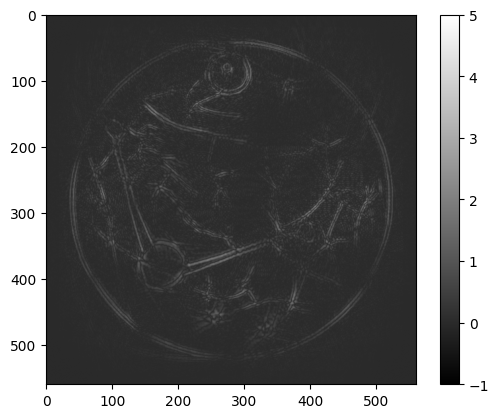

In [20]:
plt.imshow(np.abs(IP_nf - IP_nf_k2), cmap='gray', norm=norm)
plt.colorbar()